# [Landsat-8 の衛生データを取得する](https://www.tellusxdp.com/ja/howtouse/access/20200221_000214.html)

In [1]:
import os
import json

fpth_secret = os.path.join(os.environ['HOME'], 'jupyter/secret.json')
with open(fpth_secret) as f:
    secret = json.load(f)
TOKEN = secret['tellus']
HEADERS = {
    'Authorization': 'Bearer ' + TOKEN
}

In [2]:
import requests

def fetch_landsat8_scenes(lat_lon):
    url = 'https://gisapi.tellusxdp.com'
    url += '/api/v1/landsat8/scene'
    
    r = requests.get(url, params=lat_lon, headers=HEADERS)
    return r.json()

lat_lon = {
    'min_lat': 30.448673679287566,
    'min_lon': 130.78125,
    'max_lat': 30.90222470517145,
    'max_lon': 130.78125
}
scenes = fetch_landsat8_scenes(lat_lon)
print(len(scenes))

58


In [3]:
import pandas as pd

def ext_latlon(scenes):
    range_latlons = []
    for scene in scenes:
        range_latlons.append(
            [
                scene['max_lat'],
                scene['max_lon'],
                scene['min_lat'],
                scene['min_lon']
            ]
        )
    columns = ['max_lat', 'max_lon', 'min_lat', 'min_lon']
    df = pd.DataFrame(range_latlons, columns=columns, dtype='float')
    return df

df = ext_latlon(scenes)
print(df)

    max_lat  max_lon  min_lat  min_lon
0   32.7956  132.376  30.6691  130.007
1   32.7956  132.382  30.6690  130.013
2   31.3583  131.986  29.2367  129.646
3   32.7958  132.354  30.6697  129.988
4   32.7958  132.360  30.6695  129.991
5   32.7904  130.824  30.6732  128.421
6   32.7905  130.836  30.6730  128.434
7   32.7905  130.842  30.6729  128.437
8   32.7957  132.370  30.6693  130.000
9   32.7904  130.830  30.6731  128.428
10  31.3583  131.979  29.2341  129.640
11  32.7957  132.370  30.6693  130.000
12  31.3583  131.982  29.2340  129.643
13  32.7958  132.357  30.6696  129.988
14  31.3584  131.970  29.2370  129.631
15  32.7958  132.360  30.6695  129.991
16  31.3584  131.970  29.2370  129.631
17  32.7958  132.360  30.6695  129.991
18  32.7958  132.360  30.6695  129.991
19  32.7905  130.836  30.6730  128.434
20  32.7905  130.842  30.6729  128.437
21  32.7906  130.864  30.6726  128.463
22  31.3582  131.995  29.2364  129.659
23  32.7955  132.385  30.6689  130.019
24  31.3584  131.961  29.

In [6]:
extracted_df = df[
    (29.0 < df['min_lat']) & (df['max_lat'] < 32.0) &
    (129.0 < df['min_lon']) & (df['max_lon'] < 132.0)
]
print(extracted_df)
extracted_idx = list(extracted_df.index)

    max_lat  max_lon  min_lat  min_lon
2   31.3583  131.986  29.2367  129.646
10  31.3583  131.979  29.2341  129.640
12  31.3583  131.982  29.2340  129.643
14  31.3584  131.970  29.2370  129.631
16  31.3584  131.970  29.2370  129.631
22  31.3582  131.995  29.2364  129.659
24  31.3584  131.961  29.2372  129.625
30  31.3582  131.992  29.2365  129.656
36  31.3585  131.955  29.2373  129.616
40  31.3584  131.973  29.2342  129.637
41  31.3585  131.952  29.2374  129.612
52  31.3584  131.970  29.2343  129.631
53  31.3583  131.979  29.2368  129.640
55  31.2986  131.981  29.2963  129.668
56  31.2987  131.969  29.2938  129.656


In [7]:
ext_scenes = [scenes[idx] for idx in extracted_idx]
print(json.dumps(ext_scenes, indent=2))

[
  {
    "acquisitionDate": "Sun, 23 Dec 2018 01:48:12 GMT",
    "c_lat": 30.2975,
    "c_lon": 130.81599999999997,
    "cloudCover": 5.17,
    "date_added": "Tue, 25 Jun 2019 00:00:00 GMT",
    "entityId": "LC81120392018357LGN00",
    "max_lat": 31.3583,
    "max_lon": 131.986,
    "min_lat": 29.2367,
    "min_lon": 129.646,
    "path": 112,
    "productId": "LC08_L1TP_112039_20181223_20181227_01_T1",
    "row": 39,
    "thumbs_url": "https://s3-us-west-2.amazonaws.com/landsat-pds/c1/L8/112/039/LC08_L1TP_112039_20181223_20181227_01_T1/LC08_L1TP_112039_20181223_20181227_01_T1_thumb_small.jpg",
    "tile_path": "landsat8/112/039/LC08_L1TP_112039_20181223_20181227_01_T1/{z}/{x}/{y}.png"
  },
  {
    "acquisitionDate": "Wed, 30 Aug 2017 01:48:25 GMT",
    "c_lat": 30.2962,
    "c_lon": 130.8095,
    "cloudCover": 6.12,
    "date_added": "Tue, 25 Jun 2019 00:00:00 GMT",
    "entityId": "LC81120392017242LGN00",
    "max_lat": 31.3583,
    "max_lon": 131.979,
    "min_lat": 29.2341,
    "mi

https://gisapi.tellusxdp.com/landsat8/112/039/LC08_L1TP_112039_20181223_20181227_01_T1/13/7076/3369.png


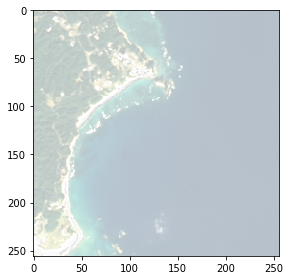

In [23]:
from skimage import io
from io import BytesIO
%matplotlib inline

def fetch_landsat8_image(sceneid, tile):
    url = 'https://gisapi.tellusxdp.com'
    url += '/' + sceneid['tile_path'].format(**tile)
    
    r = requests.get(url, headers=HEADERS)
    return io.imread(BytesIO(r.content))

tile = {
    'x': 7076,
    'y': 3369,
    'z': 13
}
img = fetch_landsat8_image(ext_scenes[0], tile)
io.imshow(img)

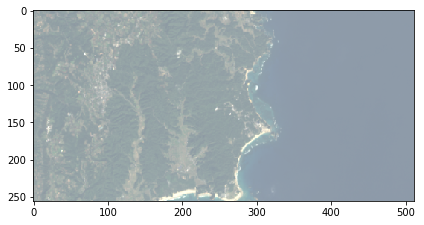

In [42]:
import numpy as np

def fetch_landsat8_blend_image(sceneid, tile, color):
    url = 'https://gisapi.tellusxdp.com'
    url += '/blend/' + sceneid['tile_path'].format(**tile)
    
    r = requests.get(url, params=color, headers=HEADERS)
    
    return io.imread(BytesIO(r.content))

color = {
    'opacity': 1,
    'r': 4,
    'g': 3,
    'b': 2,
    'rdepth': 1,
    'gdepth': 1,
    'bdepth': 1
}

tile = {
    'x': 3537,
    'y': 1684,
    'z': 12
}
img_l = fetch_landsat8_blend_image(ext_scenes[0], tile, color)

tile = {
    'x': 3538,
    'y': 1684,
    'z': 12
}
img_r = fetch_landsat8_blend_image(ext_scenes[0], tile, color)

io.imshow(np.hstack((img_l, img_r)))

In [ ]:
color = {}

tile = {
    'x': 3537,
    'y': 1684,
    'z': 12
}
img_l = fetch_landsat8_blend_image(ext_scenes[0], tile, color)

tile = {
    'x': 3538,
    'y': 1684,
    'z': 12
}
img_r = fetch_landsat8_blend_image(ext_scenes[0], tile, color)

io.imshow(np.hstack((img_l, img_r)))